In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import json
from geopy.geocoders import GoogleV3

 # Individuals and Households Program - Valid Registrations

In [30]:
dataowner = pd.read_csv("HousingAssistanceOwners.csv")
disasterSummary = pd.read_csv("DisasterDeclarationsSummaries.csv")

C:\Users\simpson xu\AppData\Local\Temp\ipykernel_6296\1336325672.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  dataowner = pd.read_csv("HousingAssistanceOwners.csv")


In [31]:
# geographic groups
labels = {
    'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA', "DE"],
    'Southeast': ['FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', "TN", "AL", "KY", "MS", 'VI'],
    'Midwest': ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'],
    'Southwest': ['AR', 'AZ', 'LA', 'NM', 'OK', 'TX'],
    'West': ['AK', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'OR', 'UT', 'WA', 'WY'],
    'Territories': ['AS', 'GU', 'MP', 'PR', "FM"]
}

# Add "Region" column to the dataframe
dataowner['Region'] = dataowner['state'].map(
    {state: region for region, states in labels.items() for state in states})

dataowner.head(3)

,disasterNumber,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,...,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id,Region
0,1439,TX,Aransas (County),ARANSAS PASS,78335,4,1345.01,3,5380.02,0,...,5915.91,3573.02,970.0,1372.89,3,0,0,0,064e6e4f-a4c9-46b3-af5e-1d84cc552b24,Southwest
1,1439,TX,Aransas (County),ARANSAS PASS,78336,68,3082.82,63,209632.06,4,...,180717.57,131097.36,23946.0,25674.21,27,26,1,0,942a9af8-155b-4d2f-ac54-b96baddb42b0,Southwest
2,1439,TX,Aransas (County),FULTON,78358,20,4722.34,18,94446.72,0,...,94240.88,58754.70,6784.0,28702.18,3,11,3,0,8bad7f2e-6706-4d6f-a39e-c07596139758,Southwest


In [32]:
print(dataowner.shape, disasterSummary.shape)

(137256, 25) (64528, 25)


In [33]:
disasterSummary.head(3)

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id
0,FM-5465-NM,5465,NM,FM,2023-05-10T00:00:00.000Z,2023,Fire,LAS TUSAS FIRE,0,0,...,0,35,33,99033,Mora (County),23050,NaN,2023-05-22T03:41:22.800Z,56e2cdd7de53fd6bd0cbe22cd681d0d87708d0ac,e46df225-24a5-4178-9368-0f1c753f8748
1,FM-5465-NM,5465,NM,FM,2023-05-10T00:00:00.000Z,2023,Fire,LAS TUSAS FIRE,0,0,...,0,35,47,99047,San Miguel (County),23050,NaN,2023-05-22T03:41:22.800Z,33f747f70112aed4df749cfb1dd58f1d50f029ff,c8660535-8995-4187-af20-771b5669d4b7
2,FM-5464-RI,5464,RI,FM,2023-04-14T00:00:00.000Z,2023,Fire,QUEENS RIVER FIRE,0,0,...,0,44,9,99009,"Washington (County)(in (P)MSA 5520,6480)",23042,NaN,2023-05-22T03:41:22.800Z,1111d4d4a33f8a6e4d383ac5bd0e60b9bf142da0,9b9a9d9c-8b03-4049-9b16-a3c0d581556c


In [34]:
# Group by disasterNumber
# Aggregate unique incidentType values
agg_disasterSummary = (disasterSummary.groupby('disasterNumber')['incidentType']
                       .apply(lambda x: ','.join(x.unique()))
                       .reset_index())

# Merge
merged_data = dataowner.merge(agg_disasterSummary, on='disasterNumber', how='left')

print(merged_data.shape)

(137256, 26)


In [35]:
merged_data.head()

,disasterNumber,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,...,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id,Region,incidentType
0,1439,TX,Aransas (County),ARANSAS PASS,78335,4,1345.01,3,5380.02,0,...,3573.02,970.0,1372.89,3,0,0,0,064e6e4f-a4c9-46b3-af5e-1d84cc552b24,Southwest,Severe Storm
1,1439,TX,Aransas (County),ARANSAS PASS,78336,68,3082.82,63,209632.06,4,...,131097.36,23946.0,25674.21,27,26,1,0,942a9af8-155b-4d2f-ac54-b96baddb42b0,Southwest,Severe Storm
2,1439,TX,Aransas (County),FULTON,78358,20,4722.34,18,94446.72,0,...,58754.70,6784.0,28702.18,3,11,3,0,8bad7f2e-6706-4d6f-a39e-c07596139758,Southwest,Severe Storm
3,1439,TX,Aransas (County),FULTON,78381,1,2578.30,1,2578.30,0,...,1407.96,726.0,1170.34,1,0,0,0,d3ce0948-ab68-4115-875d-a0fda9390c99,Southwest,Severe Storm
4,1439,TX,Aransas (County),ROCKPORT,78331,1,0.00,0,0.00,0,...,0.00,0.0,0.00,0,0,0,0,67dd11a2-9248-4f36-bc69-4a3e03750083,Southwest,Severe Storm


In [36]:
print(merged_data['incidentType'].value_counts())
print(merged_data['Region'].value_counts())

incidentType
Hurricane            60411
Severe Storm         44119
Biological           10892
Flood                10632
Severe Ice Storm      3406
Fire                  3239
Typhoon               2056
Tornado               1353
Earthquake             950
Dam/Levee Break        107
Volcanic Eruption       27
Mud/Landslide           26
Winter Storm            19
Other                    8
Name: count, dtype: int64
Region
Southeast      45065
Southwest      25104
Midwest        20726
Northeast      20101
Territories    18063
West            8197
Name: count, dtype: int64


# DATA DESCRIPTION

In [37]:
# Number of disaster types
num_disasters = merged_data['incidentType'].nunique()
print("Number of disaster types:", num_disasters)

Number of disaster types: 14


In [38]:
# Counts of claims per disaster
claims_per_disaster = merged_data['incidentType'].value_counts()
print("Counts of claims per disaster:")
print(claims_per_disaster)

Counts of claims per disaster:
incidentType
Hurricane            60411
Severe Storm         44119
Biological           10892
Flood                10632
Severe Ice Storm      3406
Fire                  3239
Typhoon               2056
Tornado               1353
Earthquake             950
Dam/Levee Break        107
Volcanic Eruption       27
Mud/Landslide           26
Winter Storm            19
Other                    8
Name: count, dtype: int64


In [39]:
# Counts of claims per state
# U.S. territories or associated states, including Purto Rico ('PR'), District of Columbia ('DC'), and etc.
claims_per_state = merged_data.groupby('state')['id'].count().sort_values(ascending=False)
# print("Counts of claims per state:")
# print(claims_per_state)

In [40]:
# Counts of claims per region
claims_per_region = merged_data.groupby('Region')['id'].count().sort_values(ascending=False)
print("Counts of claims per state:")
print(claims_per_region)

Counts of claims per state:
Region
Southeast      45065
Southwest      25104
Midwest        20726
Northeast      20101
Territories    18063
West            8197
Name: id, dtype: int64


In [41]:
claims_per_state_df = claims_per_state.to_frame().reset_index()

# Rename the columns
claims_per_state_df.columns = ['state', 'count']

# Add a new column 'Region' to the dataframe using labels
claims_per_state_df['Region'] = claims_per_state_df['state'].map(
    {state: region for region, states in labels.items() for state in states})

print(claims_per_state_df.head(5))

  state  count       Region
0    FL  17477    Southeast
1    PR  15172  Territories
2    TX  11926    Southwest
3    LA   8296    Southwest
4    NY   5870    Northeast


        Region  count
0      Midwest  20726
1    Northeast  20101
2    Southeast  45065
3    Southwest  25104
4  Territories  18063
5         West   8197


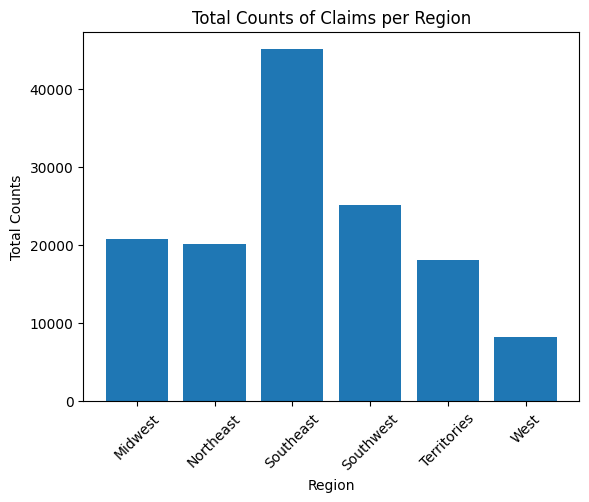

In [42]:
# Group the dataframe by 'Region'
# Calculate the sum of 'count' for each region
region_counts_df = claims_per_state_df.groupby('Region')['count'].sum().reset_index()
print(region_counts_df)

# Create bar plot
plt.bar(region_counts_df['Region'], region_counts_df['count'])
plt.xlabel('Region')
plt.ylabel('Total Counts')
plt.title('Total Counts of Claims per Region')
plt.xticks(rotation=45)
plt.show()

Average amount claimed: 238310.83427449438
        Region  Average amount claimed
0      Midwest           109652.332407
1    Northeast           205237.203024
2    Southeast           230523.244771
3    Southwest           481748.257091
4  Territories           137734.563785
5         West           163624.120101
Average amount paid: 141135.00891917292
        Region  Average amount paid
0      Midwest         85283.390457
1    Northeast        122131.748502
2    Southeast        116277.260844
3    Southwest        287281.435838
4  Territories        124635.954926
5         West         54388.895683


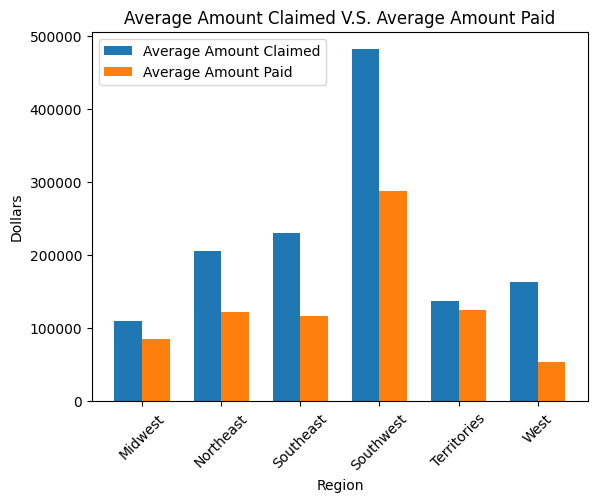

In [43]:
# Average amount claimed
avg_amount_claimed = dataowner['totalDamage'].mean()
print("Average amount claimed:", avg_amount_claimed)
# By Region
avg_amount_claimed_region = dataowner.groupby('Region')['totalDamage'].mean().reset_index()
avg_amount_claimed_region = avg_amount_claimed_region.rename(columns={'totalDamage': 'Average amount claimed'})
print(avg_amount_claimed_region)

# Average amount paid
avg_amount_paid = dataowner['totalApprovedIhpAmount'].mean()
print("Average amount paid:", avg_amount_paid)
# By Region
avg_amount_paid_region = dataowner.groupby('Region')['totalApprovedIhpAmount'].mean().reset_index()
avg_amount_paid_region = avg_amount_paid_region.rename(columns={'totalApprovedIhpAmount': 'Average amount paid'})
print(avg_amount_paid_region)

# Create the bar plot
x = np.arange(len(avg_amount_claimed_region['Region']))
plt.bar(x, avg_amount_claimed_region['Average amount claimed'], width=0.35, label='Average Amount Claimed')
plt.bar(x + 0.35, avg_amount_paid_region['Average amount paid'], width=0.35, label='Average Amount Paid')

plt.xlabel('Region')
plt.ylabel('Dollars')
plt.title('Average Amount Claimed V.S. Average Amount Paid')
plt.xticks(x + 0.35 / 2, avg_amount_paid_region['Region'], rotation=45)
plt.legend()
plt.show()

Total Counts of Inspected Damage Between 1 and 10k: 4805783
        Region  Sum of Counts
0      Midwest         580176
1    Northeast         470358
2    Southeast        1918652
3    Southwest        1130734
4  Territories         635320
5         West          70543
Total Counts of Approved Between 1 and 10k: 4069874
        Region  Sum of Counts
0      Midwest         373172
1    Northeast         286921
2    Southeast        1495049
3    Southwest         998813
4  Territories         871591
5         West          44328


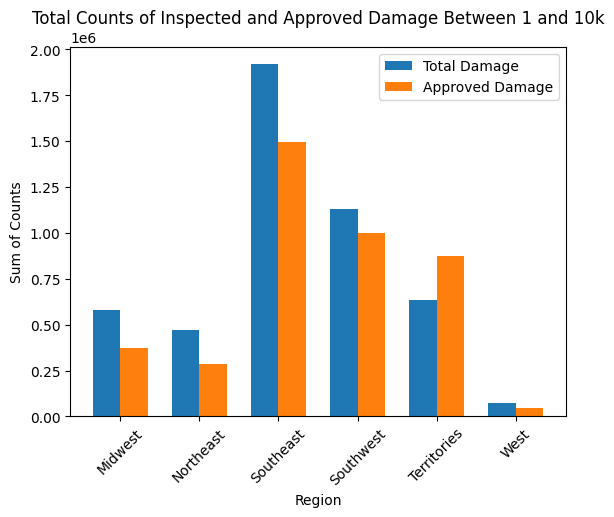

In [44]:
# Between 1 and 10k
num_1_to_10k = dataowner['femaInspectedDamageBetween1And10000'].sum()
print("Total Counts of Inspected Damage Between 1 and 10k:", num_1_to_10k)
# By Region
num_1_to_10k_region = dataowner.groupby('Region')['femaInspectedDamageBetween1And10000'].sum().reset_index()
num_1_to_10k_region = num_1_to_10k_region.rename(columns={'femaInspectedDamageBetween1And10000': 'Sum of Counts'})
print(num_1_to_10k_region)

# Approved
num_1_to_10k_approved = dataowner['approvedBetween1And10000'].sum()
print("Total Counts of Approved Between 1 and 10k:", num_1_to_10k_approved)
# By Region
num_1_to_10k_region_approved = dataowner.groupby('Region')['approvedBetween1And10000'].sum().reset_index()
num_1_to_10k_region_approved = num_1_to_10k_region_approved.rename(columns={'approvedBetween1And10000': 'Sum of Counts'})
print(num_1_to_10k_region_approved)

# Create the bar plot
x = np.arange(len(num_1_to_10k_region['Region']))
plt.bar(x, num_1_to_10k_region['Sum of Counts'], width=0.35, label='Total Damage')
plt.bar(x + 0.35, num_1_to_10k_region_approved['Sum of Counts'], width=0.35, label='Approved Damage')

plt.xlabel('Region')
plt.ylabel('Sum of Counts')
plt.title('Total Counts of Inspected and Approved Damage Between 1 and 10k')
plt.xticks(x + 0.35 / 2, num_1_to_10k_region['Region'], rotation=45)
plt.legend()
plt.show()

Total Counts of Inspected Damage Between 10k and 20k: 363767
        Region  Sum of Counts
0      Midwest          19128
1    Northeast          58144
2    Southeast         105567
3    Southwest         145648
4  Territories          29871
5         West           5409
Total Counts of Inspected Damage Between 20k and 30k: 152281
        Region  Sum of Counts
0      Midwest           8932
1    Northeast          31412
2    Southeast          38211
3    Southwest          66099
4  Territories           5346
5         West           2281


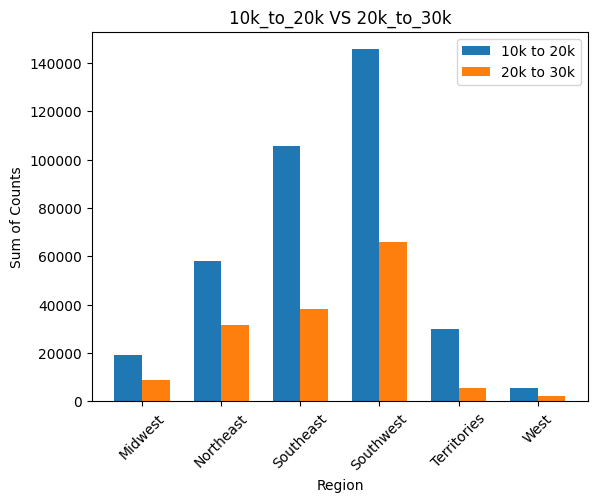

In [45]:
# Between 10001 and 20k
num_10k_to_20k = dataowner['femaInspectedDamageBetween10001And20000'].sum()
print("Total Counts of Inspected Damage Between 10k and 20k:", num_10k_to_20k)
# By Region
num_10k_to_20k_region = dataowner.groupby('Region')['femaInspectedDamageBetween10001And20000'].sum().reset_index()
num_10k_to_20k_region = num_10k_to_20k_region.rename(columns={'femaInspectedDamageBetween10001And20000': 'Sum of Counts'})
print(num_10k_to_20k_region)

# Between 20k and 30k
num_20k_to_30k = dataowner['femaInspectedDamageBetween20001And30000'].sum()
print("Total Counts of Inspected Damage Between 20k and 30k:", num_20k_to_30k)
# By Region
num_20k_to_30k_region = dataowner.groupby('Region')['femaInspectedDamageBetween20001And30000'].sum().reset_index()
num_20k_to_30k_region = num_20k_to_30k_region.rename(columns={'femaInspectedDamageBetween20001And30000': 'Sum of Counts'})
print(num_20k_to_30k_region)


# Create the bar plot
plt.bar(x, num_10k_to_20k_region['Sum of Counts'], width=0.35, label='10k to 20k')
plt.bar(x + 0.35, num_20k_to_30k_region['Sum of Counts'], width=0.35, label='20k to 30k')

plt.xlabel('Region')
plt.ylabel('Sum of Counts')
plt.title('10k_to_20k VS 20k_to_30k')
plt.xticks(x + 0.35 / 2, num_10k_to_20k_region['Region'], rotation=45)
plt.legend()
plt.show()

# Geographical Map

In [46]:
# Only Hurricane
Hurricane_data = merged_data[merged_data["incidentType"] == 'Hurricane']
print(Hurricane_data.shape)

# Hurricane_data['state'].value_counts() 
# FL = 15454

# Hurricane in florida
hurricane_FL = Hurricane_data[Hurricane_data['state'] == "FL"]
print(hurricane_FL.shape)
hurricane_FL.head()

(60411, 26)
(15454, 26)


,disasterNumber,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,...,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id,Region,incidentType
15535,1539,FL,Brevard (County),BAREFOOT BAY,32976,5,585.34,2,2926.72,1,...,0.00,0.0,0.00,0,0,0,0,1094746c-26d2-4c39-b9f2-bd6b35c915ff,Southeast,Hurricane
15536,1539,FL,Brevard (County),CAPE CANAVERAL,32920,13,220.75,5,2869.77,2,...,0.00,0.0,1935.92,2,0,0,0,eead5d6b-6684-4aac-b4bf-83af27f83ebc,Southeast,Hurricane
15537,1539,FL,Brevard (County),COCOA,32922,80,1070.47,49,85637.44,11,...,35072.43,8760.0,8234.76,21,4,1,0,e2feda04-9ac1-4f42-b3c4-b62c6dbe58ff,Southeast,Hurricane
15538,1539,FL,Brevard (County),COCOA,32926,158,1104.62,118,174530.73,25,...,63048.96,17924.0,44799.15,62,11,1,0,f177c73a-898b-4773-b270-2d468206ada1,Southeast,Hurricane
15539,1539,FL,Brevard (County),COCOA,32927,209,748.53,141,156442.37,40,...,37095.38,6380.0,56814.86,78,5,0,0,a6f6c0dc-c81e-473d-94ac-546b8966c9f9,Southeast,Hurricane


In [47]:
# Convert all values in 'zipCode' column to string
hurricane_FL['zipCode'] = hurricane_FL['zipCode'].astype(str)

# Check if values are five digits starting with '3'
filter_1 = hurricane_FL['zipCode'].str.match('^3\d{4}$')

# Remove rows that do not match the criteria
hurricane_FL = hurricane_FL[filter_1].reset_index(drop=True)

print(hurricane_FL.shape)

(15356, 26)


C:\Users\simpson xu\AppData\Local\Temp\ipykernel_6296\1121054502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hurricane_FL['zipCode'] = hurricane_FL['zipCode'].astype(str)


In [48]:
hurricane_FL.head(3)

,disasterNumber,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,...,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id,Region,incidentType
0,1539,FL,Brevard (County),BAREFOOT BAY,32976,5,585.34,2,2926.72,1,...,0.00,0.0,0.00,0,0,0,0,1094746c-26d2-4c39-b9f2-bd6b35c915ff,Southeast,Hurricane
1,1539,FL,Brevard (County),CAPE CANAVERAL,32920,13,220.75,5,2869.77,2,...,0.00,0.0,1935.92,2,0,0,0,eead5d6b-6684-4aac-b4bf-83af27f83ebc,Southeast,Hurricane
2,1539,FL,Brevard (County),COCOA,32922,80,1070.47,49,85637.44,11,...,35072.43,8760.0,8234.76,21,4,1,0,e2feda04-9ac1-4f42-b3c4-b62c6dbe58ff,Southeast,Hurricane


In [49]:
# Group by 'zipCode'
# Calculate the sum of 'validRegistrations'
aggregated = hurricane_FL.groupby('zipCode')['validRegistrations'].sum().reset_index()

# Rename the columns to 'zip' and 'frequency'
frequency_df = aggregated.rename(columns={'zipCode': 'zip', 'validRegistrations': 'frequency'})
frequency_df = frequency_df.sort_values(by='frequency', ascending=False)

# Reset the index
frequency_df = frequency_df.reset_index(drop=True)

print(frequency_df)

        zip  frequency
0     33952      17468
1     33023      17462
2     33908      16836
3     32738      16318
4     33463      15377
...     ...        ...
1592  33388          1
1593  33384          1
1594  33366          1
1595  33361          1
1596  39993          1

[1597 rows x 2 columns]


In [50]:
# geolocator = GoogleV3(api_key='YOUR_OWN')

# def get_lat_lon(zip_code):
#     location = geolocator.geocode(f"{zip_code}, FL", timeout=10)
#     if location:
#         return location.latitude, location.longitude
#     else:
#         return None, None

# frequency_df['latitude'], frequency_df['longitude'] = zip(*frequency_df['zip'].apply(get_lat_lon))

# print(frequency_df)

In [51]:
# frequency_df = frequency_df.dropna()
# frequency_df.to_csv('frequency.csv', index=False)

In [52]:
# frequency_df.drop('zip', axis=1, inplace=True)
frequency_df = pd.read_csv('frequency.csv')
frequency_df = frequency_df[["latitude", "longitude", "frequency"]]
frequency_df.shape

(1590, 3)

In [53]:
# Rescaling the 'frequency' column
minColorVal = frequency_df['frequency'].min()
maxColorVal = frequency_df['frequency'].max()

frequency_df['frequency'] = (frequency_df['frequency'] - minColorVal) / (maxColorVal - minColorVal)

print(frequency_df)

       latitude  longitude  frequency
0     26.986990 -82.095180   1.000000
1     25.986874 -80.215400   0.999656
2     26.510137 -81.942570   0.963817
3     28.907532 -81.174750   0.934162
4     26.606400 -80.131693   0.880289
...         ...        ...        ...
1585  26.117690 -80.254789   0.000000
1586  27.664827 -81.515754   0.000000
1587  27.664827 -81.515754   0.000000
1588  27.664827 -81.515754   0.000000
1589  27.664827 -81.515754   0.000000

[1590 rows x 3 columns]


In [54]:
colorGradient = {
    0.0: 'blue',
    0.1: 'cyan',
    0.2: 'lightgreen',
    0.3: 'green',
    0.4: 'yellowgreen',
    0.5: 'yellow',
    0.6: 'orange',
    0.7: 'lightcoral', 
    0.8: 'red',
    0.9: 'darkred',
    1.0: 'darkred' 
}

In [55]:
import folium
from folium.plugins import HeatMap

florida_coordinates = [27.9944024, -81.7602544]
mapObj = folium.Map(location=florida_coordinates, zoom_start=7)
HeatMap(frequency_df, gradient=colorGradient).add_to(mapObj)
mapObj.save('demo11.html')

# Importing with URL

In [56]:
import requests
import json
import pandas as pd

data_list = []
skip = 0
top = 10000
#while len(data_list) < 20720258:
while len(data_list) < 20000:
    url = f"https://www.fema.gov/api/open/v1/IndividualsAndHouseholdsProgramValidRegistrations?$skip={skip}&$top={top}"
    response = requests.get(url)
    data_list.extend(response.json()['IndividualsAndHouseholdsProgramValidRegistrations'])
    skip += 10000

data_df = pd.json_normalize(data_list)
if data_df.iloc[0]['id'] == data_df.iloc[10000]['id']:
    print("did not import successfully")

# data_df.head()

# print(data_df.iloc[0])
# print(data_df.iloc[10000])